In [1]:
##

import gym

from stable_baselines import GAIL, SAC
from stable_baselines.gail import ExpertDataset, generate_expert_traj

import gym
import numpy as np

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import PPO1
# from particle_env import PrticleEnv
from particle_env_continuous import PrticleEnv

import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s" % (info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())





/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data3/maze/project/stabl

In [2]:
# Generate expert trajectories (train expert)
model = SAC('MlpPolicy', 'Pendulum-v0', verbose=1)
generate_expert_traj(model, 'expert_pendulum', n_timesteps=100, n_episodes=10)



Creating environment from the given name, wrapped in a DummyVecEnv.


/data3/maze/project/stable-baselines/venv/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


obs (2000, 3)
actions (2000, 1)
episode_returns (10,)
rewards (2000,)
episode_starts (2000,)


{'actions': array([[0.23764372],
        [0.31341982],
        [0.47183537],
        ...,
        [1.5332112 ],
        [1.4895136 ],
        [1.4968305 ]], dtype=float32),
 'episode_returns': array([-1392.05629963, -1492.8829577 , -1476.13203824, -1398.77649522,
        -1599.0353334 , -1450.04838269, -1461.03865397, -1488.71147981,
        -1509.04169083, -1464.49385977]),
 'episode_starts': array([ True, False, False, ..., False, False, False]),
 'obs': array([[-0.80093205,  0.59875524,  0.05670708],
        [-0.81684554,  0.57685643,  0.54142004],
        [-0.84521914,  0.5344199 ,  1.0210754 ],
        ...,
        [ 0.3242658 , -0.945966  ,  6.6756954 ],
        [ 0.59723204, -0.80206853,  6.1962028 ],
        [ 0.80218726, -0.59707254,  5.8180785 ]], dtype=float32),
 'rewards': array([-6.24861097, -6.41371346, -6.74938726, ..., -5.99783325,
        -4.70780849, -3.79664803])}

In [4]:
# Load the expert dataset
dataset = ExpertDataset(expert_path='expert_pendulum.npz', traj_limitation=10, verbose=1)

model = GAIL('MlpPolicy', 'Pendulum-v0', dataset, verbose=1)
# Note: in practice, you need to train for 1M steps to have a working policy
model.learn(total_timesteps=1000)
model.save("gail_pendulum")

del model # remove to demonstrate saving and loading



obs (2000, 3)
actions (2000, 1)
episode_returns (10,)
rewards (2000,)
episode_starts (2000,)
Total trajectories: 10
Total transitions: 2000
Average returns: -1473.2217191235163
Std for returns: 55.35216858096358
Creating environment from the given name, wrapped in a DummyVecEnv.
********** Iteration 0 ************
Optimizing Policy...
sampling
done in 1.388 seconds
computegrad
done in 0.041 seconds
conjugate_gradient
      iter residual norm  soln norm
         0     0.0292          0
         1     0.0158     0.0248
         2    0.00124      0.073
         3    0.00107      0.119
         4   0.000597      0.159
         5   0.000614       0.35
         6   4.88e-05      0.396
         7   4.24e-05      0.451
         8   2.27e-06      0.451
         9   9.19e-07      0.477
        10   6.57e-06      0.479
done in 0.105 seconds
Expected: 0.020 Actual: 0.021
Stepsize OK!
vf
done in 0.084 seconds
sampling
done in 1.589 seconds
computegrad
done in 0.006 seconds
conjugate_gradient
      

Process Process-1:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data3/maze/project/stable-baselines/stable_baselines/gail/dataset/dataset.py", line 295, in _run
    self.queue.put(None)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 82, in put
    if not self._sem.acquire(block, timeout):
KeyboardInterrupt


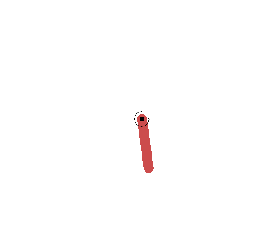

KeyboardInterrupt: 

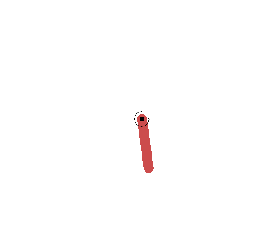

In [8]:
model = GAIL.load("gail_pendulum")

env = gym.make('Pendulum-v0')
obs = env.reset()
while True:
  action, _states = model.predict(obs)
  obs, rewards, dones, info = env.step(action)
#   env.render()
  show_state(env)
#   print(env.render(mode='rgb_array'))